In [1]:
#Import all Neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
import matplotlib.ticker as ticker



In [2]:
#Load in the cleaned dataset into a pandas dataframe, print statistics
df = pd.read_csv('allcleanedcrimedata', index_col=0)

In [3]:
#Confirm that the right data set is loaded 
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677556 entries, 10304468 to 230906458
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date_occ        677556 non-null  object 
 1   time_occ        677556 non-null  int64  
 2   AREA            677556 non-null  int64  
 3   area_name       677556 non-null  object 
 4   rpt_dist_no     677556 non-null  int64  
 5   crm_cd          677556 non-null  object 
 6   crm_cd_desc     677556 non-null  object 
 7   Mocodes         677556 non-null  object 
 8   vict_age        677556 non-null  int64  
 9   vict_sex        677556 non-null  object 
 10  vict_descent    677556 non-null  object 
 11  premis_cd       677556 non-null  float64
 12  premis_desc     677556 non-null  object 
 13  weapon_used_cd  677556 non-null  float64
 14  weapon_desc     677556 non-null  object 
 15  Status          677556 non-null  object 
 16  status_desc     677556 non-null  object 
 17  

In [4]:
# Drop unnecessary columns 
df.drop(['date_occ', 'crm_cd_desc', 'weapon_desc', 'time_occ', 'crm_cd', 'AREA', 'rpt_dist_no', 'Mocodes', 'weapon_used_cd', 'Status', 'LOCATION', 'cross_street', 'LAT', 'LON', 'Year', 'Month', 'Day', 'crime_category'], axis=1, inplace=True)

In [5]:
# Convert Crm Cd column to string
#df['crm_cd_desc'] = df['crm_cd_desc'].astype(str)

In [6]:
# Encode categorical variables
cat_cols = ['area_name', 'vict_sex', 'vict_descent', 'premis_desc', 'status_desc']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [7]:
# Take a random sample of size 5000 from the data
crime_data = df.sample(n=5000, random_state=42)

In [8]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(crime_data)

In [9]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(crime_data.drop('crime_type', axis=1), crime_data['crime_type'], test_size=0.2, random_state=50)

In [10]:
#Robust scaling

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Initialize classifiers
rf = RandomForestClassifier()
svm = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [12]:
# Create a list of classifiers and their respective parameter grids for hyperparameter tuning
classifiers = [('Random Forest', rf, {'n_estimators': [10, 50, 100]}),
               ('SVM', svm, {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
               ('Logistic Regression', lr, {'C': [0.1, 1, 10]}),
               ('KNN', knn, {'n_neighbors': [3, 5, 7]})]

In [13]:
# Define a dictionary to store the best estimator for each classifier after hyperparameter tuning
best_estimators = {}

# Iterate over each classifier and their respective parameter grid
for name, classifier, param_grid in classifiers:
    # Initialize GridSearchCV with the given classifier, parameter grid, and 5-fold cross-validation
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train_scaled, y_train)
    # Print the best hyperparameters for the current classifier
    print(f'Best hyperparameters for {name}: {grid_search.best_params_}')
    # Store the best estimator for the current classifier in the dictionary
    best_estimators[name] = grid_search.best_estimator_

Best hyperparameters for Random Forest: {'n_estimators': 100}
Best hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best hyperparameters for Logistic Regression: {'C': 0.1}


C:\Users\Oby\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Oby\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` t

Best hyperparameters for KNN: {'n_neighbors': 7}


In [14]:
# Generate predicted labels for test data using best models found for each classifier
y_pred_rf = best_estimators['Random Forest'].predict(X_test_scaled)
y_pred_svm = best_estimators['SVM'].predict(X_test_scaled)
y_pred_lr = best_estimators['Logistic Regression'].predict(X_test_scaled)
y_pred_knn = best_estimators['KNN'].predict(X_test_scaled)


C:\Users\Oby\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
# Iterate over the best estimator dictionary and print the confusion matrix and classification report for each classifier
for name, model in best_estimators.items():
    # Generate predicted labels for test data using the best model
    y_pred = model.predict(X_test_scaled)
    # Print the confusion matrix and classification report for the current classifier
    print(f'Confusion matrix for {name}:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print(f'Classification report for {name}:')
    print(classification_report(y_test, y_pred))
    print('\n')


Confusion matrix for Random Forest:
[[592 106]
 [134 168]]


Classification report for Random Forest:
              precision    recall  f1-score   support

    Property       0.82      0.85      0.83       698
     Violent       0.61      0.56      0.58       302

    accuracy                           0.76      1000
   macro avg       0.71      0.70      0.71      1000
weighted avg       0.75      0.76      0.76      1000



Confusion matrix for SVM:
[[636  62]
 [171 131]]


Classification report for SVM:
              precision    recall  f1-score   support

    Property       0.79      0.91      0.85       698
     Violent       0.68      0.43      0.53       302

    accuracy                           0.77      1000
   macro avg       0.73      0.67      0.69      1000
weighted avg       0.76      0.77      0.75      1000



Confusion matrix for Logistic Regression:
[[645  53]
 [208  94]]


Classification report for Logistic Regression:
              precision    recall  f1-score 

C:\Users\Oby\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


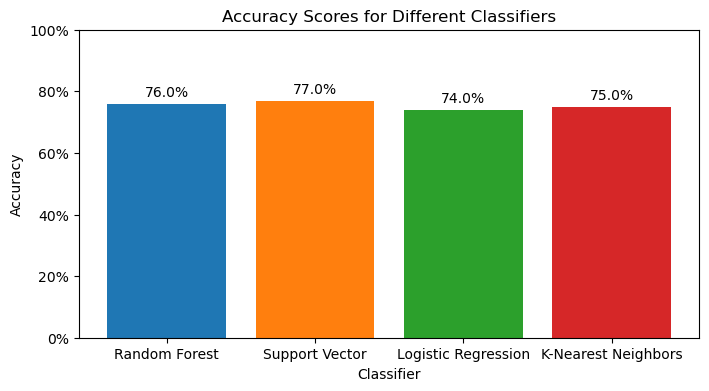

In [16]:
#Plot the Acciracy scors of the different classifiers

classifiers = ['Random Forest', 'Support Vector', 'Logistic Regression', 'K-Nearest Neighbors']
accuracies = [0.76, 0.77, 0.74, 0.75]

fig, ax = plt.subplots(figsize=(8, 4))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create bar chart
rects = ax.bar(classifiers, accuracies, color=colors)

# Set y-axis to show percentages
ax.set_ylim([0, 1])
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# Add labels and title
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for Different Classifiers')

# Add text annotations for each bar
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.annotate(f'{accuracies[i]:.1%}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
# Display plot
plt.show()

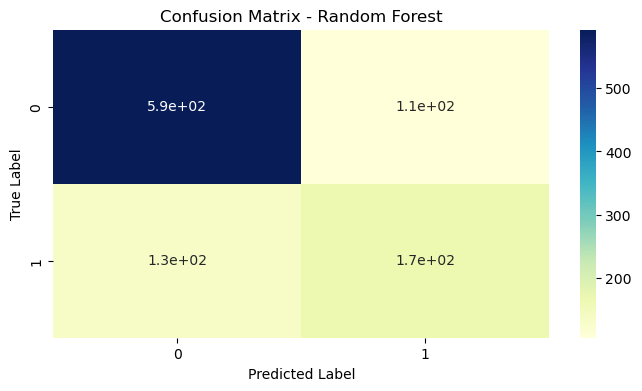

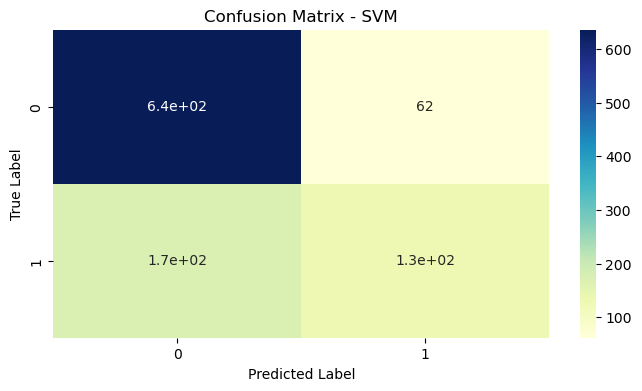

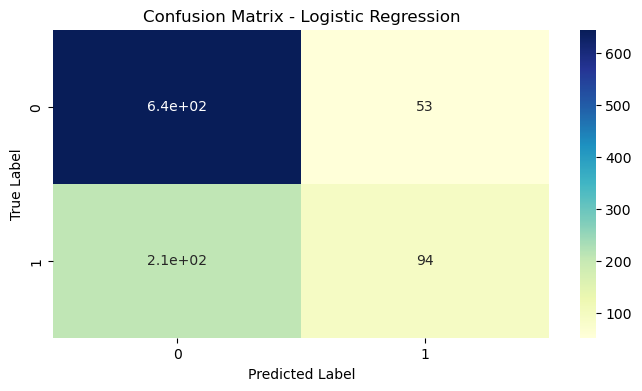

C:\Users\Oby\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


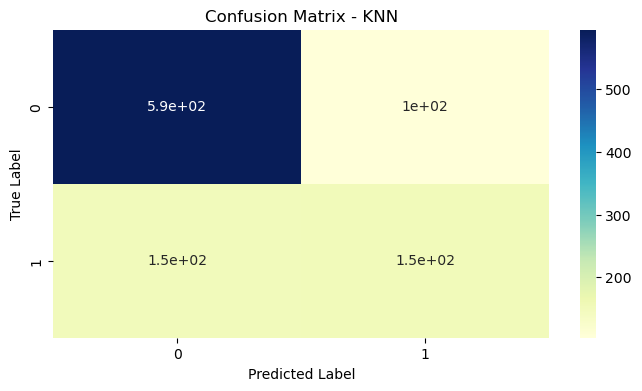

In [17]:
#Create the confusion Matrix Heatmap
# Iterate over the best estimators dictionary and create a confusion matrix heatmap for each classifier
for name, estimator in best_estimators.items():
    # Generate predicted labels for test data using the current classifier
    y_pred = estimator.predict(X_test_scaled)
    # Create a confusion matrix heatmap for the current classifier
    plt.figure(figsize=(8, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [18]:
#Calculate the Feature Importance

# create a pandas dataframe with features and their importance values
feature_importances_df = pd.DataFrame({'Feature': X_train.columns,
                                       'Importance': best_estimators['Random Forest'].feature_importances_})

# sort the dataframe by importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# display the dataframe
print(feature_importances_df)


        Feature  Importance
1      vict_age    0.289254
0     area_name    0.189114
6   status_desc    0.145177
4     premis_cd    0.111167
3  vict_descent    0.108175
5   premis_desc    0.101582
2      vict_sex    0.055531


[0.18911376 0.28925391 0.05553075 0.10817543 0.11116704 0.10158238
 0.14517673]


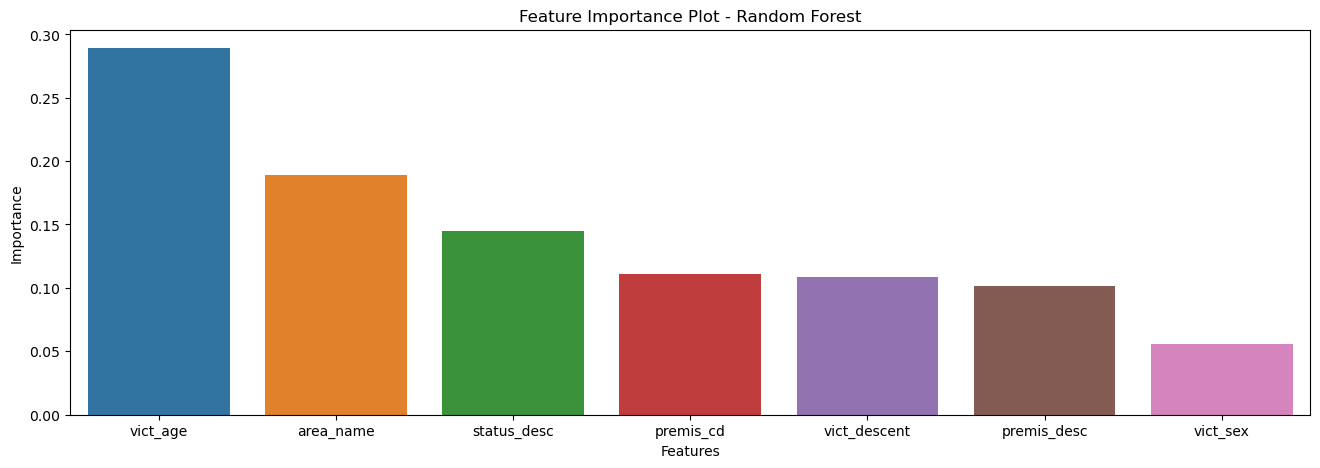

In [19]:
##FEATURE IMPORTANCE
# Get feature importances from the best Random Forest model
feature_importances = best_estimators['Random Forest'].feature_importances_

# print the numerical values of feature importances
print(feature_importances)

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [crime_data.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(16, 5))
sns.barplot(x=names, y=feature_importances[indices])
plt.title("Feature Importance Plot - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
